In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

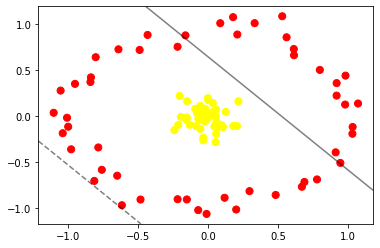

In [44]:
from sklearn.datasets._samples_generator import make_circles
from sklearn.svm import SVC

x, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(x, y)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

##### For one simple projection we could use would be to compute a radial basis function centered on the middle clump

In [45]:
r = np.exp(-(x ** 2).sum(1))

##### It is clear that no linear discrimination will ever be able to separate this data. We might project the data into a higher dimension such that a linear separator would be sufficient.

##### We can visualize this extra data dimension using a three-dimensional plot

In [49]:
import mpl_toolkits.mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=180, X=x, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(x[:, 0], x[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[180, -180], azip=(-180, 180),
         X=fixed(x), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(180, -180), value=180), IntSlider(value=180, descr…

##### We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, r=0.7.

In [50]:

clf = SVC(kernel='rbf', C=1E6)
clf.fit(x, y)

SVC(C=1000000.0)

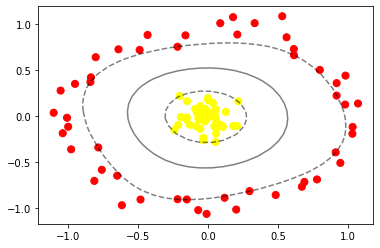

In [52]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

#### Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary. This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.